In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 6
cur_path = os.getcwd()

In [60]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [61]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(12692, 30, 30, 3) (12692,)


In [62]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)

(10153, 30, 30, 3) (2539, 30, 30, 3) (10153,) (2539,)


In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6, activation='softmax'))

In [6]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
318/318 [==============================] - 34s 107ms/step - loss: 1.4016 - accuracy: 0.4951 - val_loss: 0.7206 - val_accuracy: 0.7101
Epoch 2/20
318/318 [==============================] - 35s 110ms/step - loss: 0.7096 - accuracy: 0.7010 - val_loss: 0.4289 - val_accuracy: 0.8484
Epoch 3/20
318/318 [==============================] - 34s 108ms/step - loss: 0.5110 - accuracy: 0.7988 - val_loss: 0.2841 - val_accuracy: 0.9015
Epoch 4/20
318/318 [==============================] - 35s 109ms/step - loss: 0.3880 - accuracy: 0.8551 - val_loss: 0.2386 - val_accuracy: 0.9011
Epoch 5/20
318/318 [==============================] - 35s 110ms/step - loss: 0.3220 - accuracy: 0.8770 - val_loss: 0.1857 - val_accuracy: 0.9256
Epoch 6/20
318/318 [==============================] - 35s 111ms/step - loss: 0.2891 - accuracy: 0.8916 - val_loss: 0.2225 - val_accuracy: 0.9153
Epoch 7/20
318/318 [==============================] - 35s 111ms/step - loss: 0.2562 - accuracy: 0.9046 - val_loss: 0.2086 - val_ac

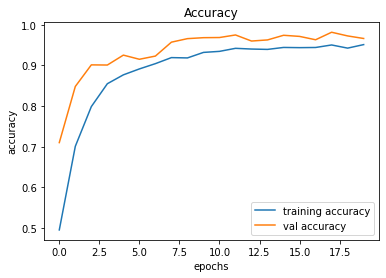

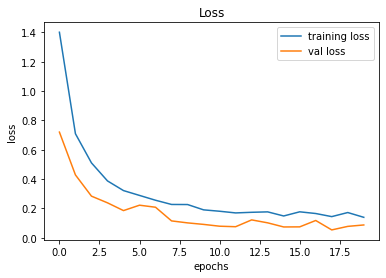

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [63]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('labels.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

In [64]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('labels.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
print(imgs)

['C:\\Users\\ADMIN\\Desktop\\ML\\myData\\0\\pic0.jpg'
 'C:\\Users\\ADMIN\\Desktop\\ML\\myData\\1\\pic11.jpg'
 'C:\\Users\\ADMIN\\Desktop\\ML\\myData\\2\\pic0.jpg'
 'C:\\Users\\ADMIN\\Desktop\\ML\\myData\\3\\pic0.jpg'
 'C:\\Users\\ADMIN\\Desktop\\ML\\myData\\4\\pic23.jpg'
 'C:\\Users\\ADMIN\\Desktop\\ML\\myData\\5\\pic0.jpg']


In [65]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

1.0


In [66]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('my_model.h5')

In [67]:
#dictionary to label all traffic signs class.
classes = { 1:'Cooker',
            2:'Fork', 
            3:'Pan', 
            4:'Plate', 
            5:'Spoon', 
            6:'Stove', 
     }

In [5]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Kitchen Appliances classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    ##############################im.show(image)
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    pred = np.argmax(pred,axis=0)
    
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Kitchen Appliance",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Plate


In [30]:
y_pred=model.predict(X_test).round(2)
y_pred

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.4 , 0.  , 0.09, 0.51, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]], dtype=float32)

In [29]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

0

In [51]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred ]
cm=confusion_matrix((y_test),str(y_pred_labels))
#show cm
sns.heatmap(cm,annot=True, fmt='d',xticklabels=classes,yticklabels=classes)

ValueError: Found input variables with inconsistent numbers of samples: [6, 18]

<Figure size 1152x648 with 0 Axes>

In [53]:
X.shape
X.reshape(-1,1)

AttributeError: 'str' object has no attribute 'shape'

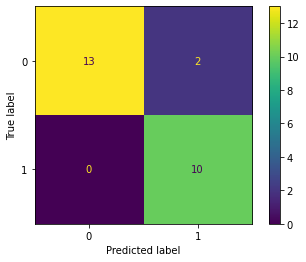

In [74]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
SVC(random_state=42)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()